In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import requests
import seaborn as sns  

In [3]:
cd "C:\Users\Andre\Videos\mlclass-master\03_Validation"

C:\Users\Andre\Videos\mlclass-master\03_Validation


<h1>Atributos do dataset:</h1><br>
<strong>Sex</strong>: M, F e I (infantil)<br>
<strong>Length</strong>: maior medida em mm da concha<br>
<strong>Diameter</strong>: diametro em mm perpendicular a medida Length<br>
<strong>Height</strong>: altura em mm com a carne dentro da concha<br>
<strong>Whole weight</strong>: peso em gramas de toda a abalone<br>
<strong>Shucked weight</strong>: peso em gramas da carne<br>
<strong>Viscera weight</strong>: peso em gramas das víceras após escorrer<br>
<strong>Shell weight</strong>: peso em gramas para a concha após estar seca<br>
<strong>Type</strong>: variável de classe (1, 2 ou 3) para o abalone<br>

In [58]:
data = pd.read_csv('abalone_dataset.csv')
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


<h1>Preprocessing</h1>

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_sex_col = encoder.fit_transform(data.sex)

data_with_encoded_sex = data.copy()
data_with_encoded_sex['sex'] = new_sex_col 
data_with_encoded_sex.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,2,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,1,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,1,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,2,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,1,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


<h1>Correlation between variables </h1>
<br>
Deleted variables: <strong>sex</strong> (low correlation), <strong>whole_weight,viscera_weight</strong> (high correlation with <strong>shell_weight</strong>)

<img src='fig.png'></img>

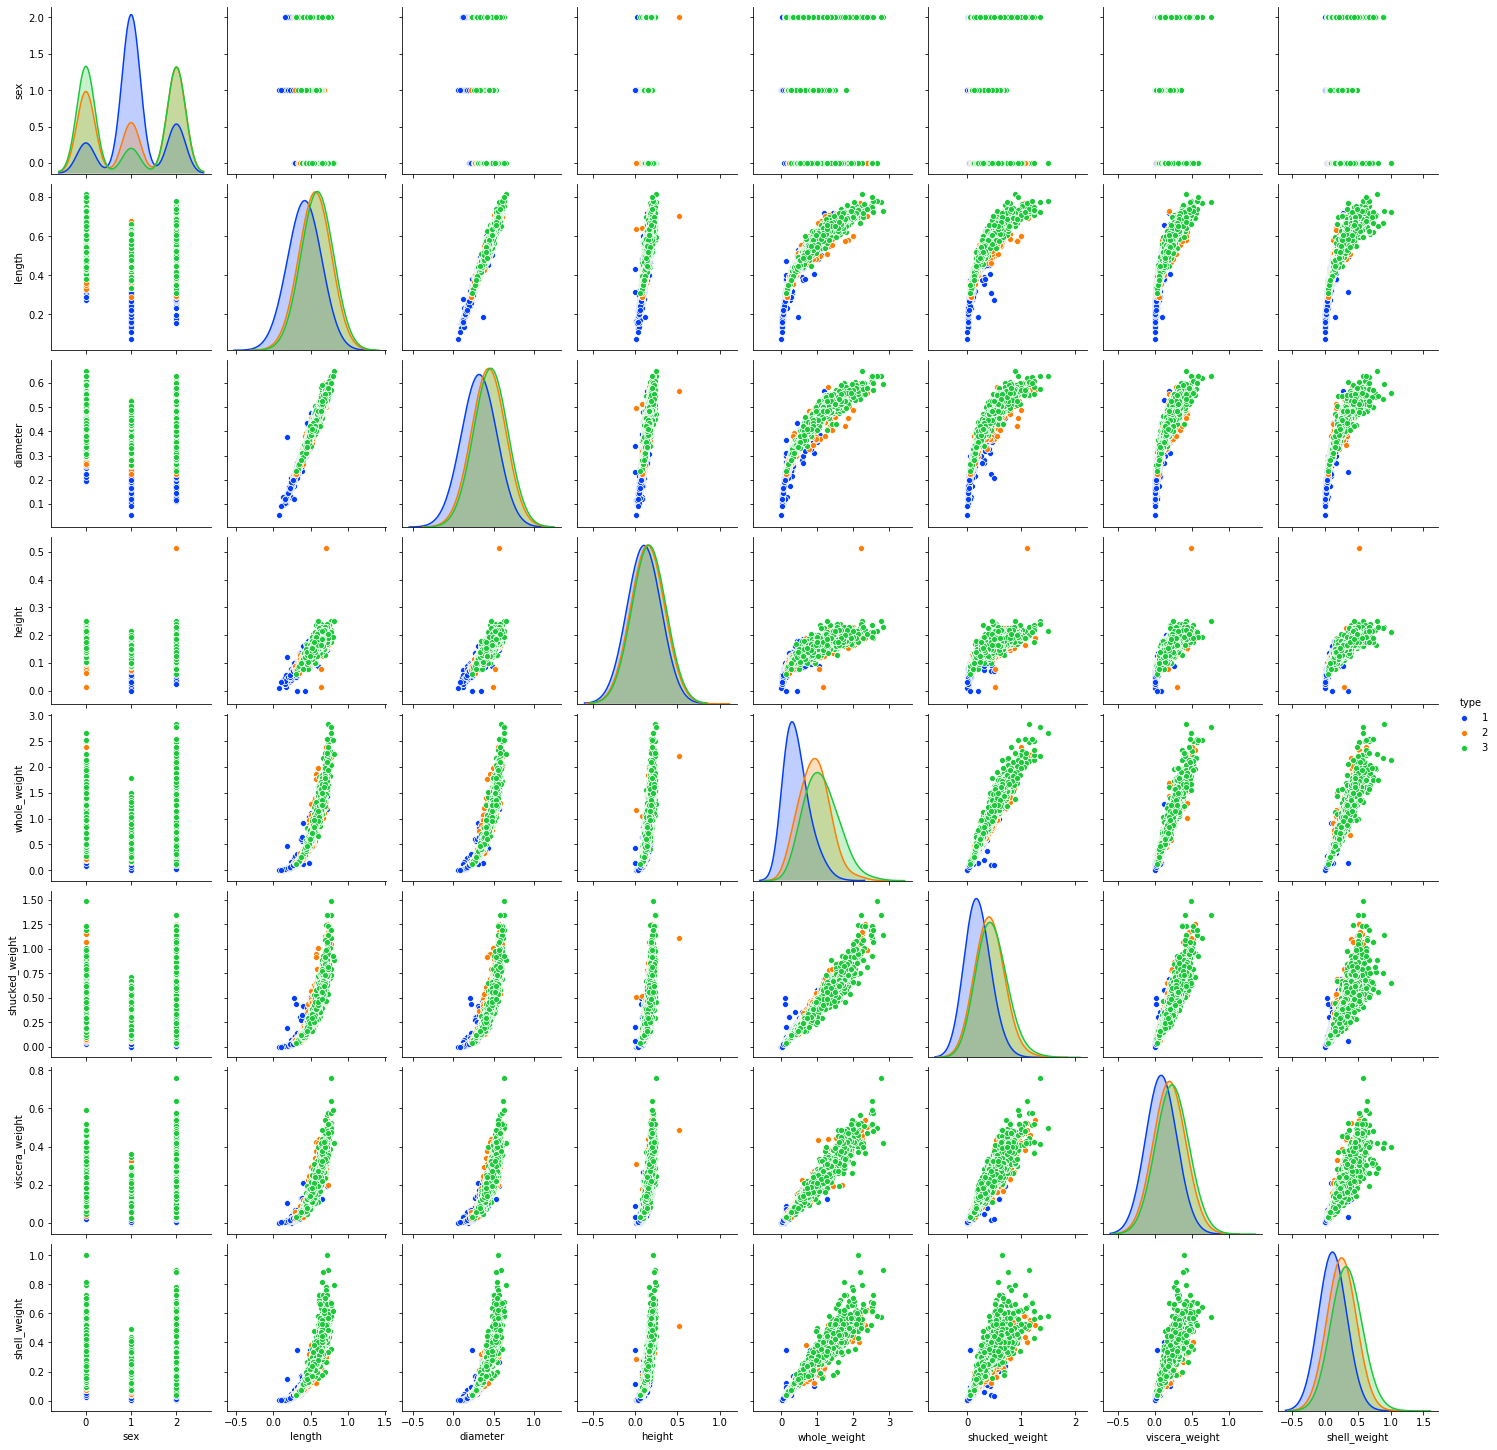

In [56]:
sns.pairplot(data_with_encoded_sex,hue='type',diag_kws={'bw': 0.2},palette='bright')

<h1> Features Selection </h1>

In [13]:
data = data[['diameter','height','shucked_weight','shell_weight','type']]
data.head(5)

,diameter,height,shucked_weight,shell_weight,type
0,0.420,0.150,0.2575,0.2400,3
1,0.380,0.115,0.2150,0.1660,1
2,0.130,0.045,0.0120,0.0095,1
3,0.450,0.170,0.3170,0.2200,3
4,0.415,0.150,0.3595,0.2250,1


<h1>Data split</h1>

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.drop('type',axis=1),data.type,test_size=0.1,random_state=42)

print('x_train shape = {}\ny_train shape = {}'.format(x_train.shape[0],y_train.shape[0]))
print('x_test shape = {}\ny_test shape = {}'.format(x_test.shape[0],y_test.shape[0]))

x_train shape = 2818
y_train shape = 2818
x_test shape = 314
y_test shape = 314


<h1>Hyperparameters Selection</h1>

In [44]:
from sklearn.svm import SVC

def get_neighbors(gamma,c):
  neighbor = []

  neighbor.append([0.1 if gamma-0.1 < 0.1 else gamma - 0.1,0.1 if c-0.1 < 0.2 else c - 0.1])
  neighbor.append([1 if gamma+0.1 > 1 else gamma + 0.1,1 if c-0.1 < 0.2 else c - 0.1])
  
  neighbor.append([1 if gamma-1 < 0.1 else gamma - 1,1 if c-1 < 1 else c - 1])
  neighbor.append([1 if gamma+1 < 0.1 else gamma + 1,1 if c+1 < 1 else c + 1])
    
  neighbor.append([np.random.uniform(0,10),np.random.uniform(0,10)])

  return neighbor

def hill_climbing(gamma,c,iter):

  best_score = 0
  best_gamma = gamma
  best_c = c

  for i in tqdm(range(iter)):
    for state in get_neighbors(gamma,c):

      clf = SVC(gamma=state[0],C=state[1])
      clf.fit(x_train,y_train)
        
      current_score = clf.score(x_test,y_test)
    
      if best_score < current_score:
        best_score = current_score
        best_gamma = state[0]
        best_c = state[1]
    
    gamma = best_gamma
    c = best_c

  return best_gamma,best_c,best_score

In [48]:
_gamma,_c = 1,1
g,c,score = hill_climbing(_gamma,_c,200)


 32%|██████████████████████████▎                                                      | 65/200 [03:21<06:43,  2.99s/it]


 66%|████████████████████████████████████████████████████▍                           | 131/200 [06:59<03:39,  3.18s/it]


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [10:31<00:12,  4.05s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [10:42<00:00,  3.21s/it]


In [49]:
print('Best_g = {}, Best_c= {}, Best_score= {}'.format(g,c,score))

Best_g = 2.1808310412033305, Best_c= 8.78805046532577, Best_score= 0.6815286624203821


<h1>Define Model</h1>

In [50]:
from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#rfc = RandomForestClassifier(n_estimators=58)
#rfc.fit(x_train,y_train)

#knn = KNeighborsClassifier(n_neighbors=93)
#knn.fit(x_train,y_train)

clf = SVC(kernel='rbf',gamma=g,C=c)
clf.fit(x_train,y_train)

SVC(C=8.78805046532577, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=2.1808310412033305, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

<h1>Model Validation</h1>

In [53]:
clf.score(x_test,y_test)

0.6815286624203821

<h1>Model Predict</h1>

In [52]:
cols_test = ['diameter','height','shucked_weight','shell_weight']
data_test = pd.read_csv('abalone_app.csv')
data_test = data_test[cols_test]
data_test.head(5)

,diameter,height,shucked_weight,shell_weight
0,0.480,0.175,0.4125,0.4150
1,0.385,0.150,0.5425,0.2845
2,0.520,0.180,0.5775,0.3170
3,0.510,0.170,0.5670,0.4090
4,0.540,0.215,0.6950,0.4440


In [54]:
y_pred = clf.predict(data_test)

<h1>Submit predicted values</h1>

In [55]:
# Enviando previsões realizadas com o modelo para o servidor
URL = 'https://aydanomachado.com/mlclass/03_Validation.php'

#TODO Substituir pela sua chave aqui
DEV_KEY = "Andre Santos"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"Andre Santos","accuracy":0.6478468899521531,"old_accuracy":0.64784688995215} 

